# Survey Analysis

## Libraries Used

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataGLA = pd.read_csv('SurveyFormFinal.csv')

In [7]:
dataGLA.head()

,Timestamp,Course:,Branch (if any):,Currently staying at:,Do you have interest in outdoor games?,How much time you dedicate for your games?,How much time you dedicate for your studies?,Do you like coding?,Are you certified in any of the given language?,Preferable websites for doing extra courses :,...,What style of teaching do you prefer?,Would you prefer to go in classroom with laptops?,What do you want to become?,Would you like an amendment in the University policy of 1 student 1 job?,Should there be a trial class for a new joining(teacher) so that students can take a call on the teacher?,Duration of trial class should be?,Should there be night classes as an option so that if you wish you can join the night batch?,What outlook of the University do you get from its current scenario and ongoing proceedings?,Should there be courses introduced in University which provide earning while learning?,"Overall, how happy are you with your academic experience and university life?"
0,2018/03/14 11:16:50 AM GMT+5:30,B.Tech,Cs,Home(with relatives),Yes,3 hr,3 hr,Yes,C/C++,Udemy,...,Ppt,Yes,Software/ Website Developer,Allowed to sit for at least 2 companies and 1 ...,Yes,At most 4 hours (one week),Yes,Passionate for placement,No,3
1,2018/03/16 4:19:19 PM GMT+5:30,MBA,NaN,Home(with parents),Yes,1 hr,1 hr,No,No,What is it....???,...,Ppt,No,H R manager,Allowed to sit for at least 2 companies and 1 ...,Yes,At least 2 hours,No,School type learning,Yes,5
2,2018/03/16 4:20:04 PM GMT+5:30,B.Tech,computer science and engineering,Rented room,Yes,1 hr,More than 3 hr,Yes,Java,Udemy,...,Ppt +blackboard,No,Software/ Website Developer,Allowed to sit for at least 2 companies,Yes,At most 4 hours (one week),No,Passionate for placement,Yes,3
3,2018/03/16 4:20:36 PM GMT+5:30,Polytechnic,C.S,Hostel,Yes,More than 3 hr,2 hr,Yes,C/C++,Coursera,...,Ppt +blackboard,No,Software/ Website Developer,Allowed to sit for at least 2 companies,Yes,Just one lecture,Yes,Passionate for Learning,Yes,3
4,2018/03/16 4:21:28 PM GMT+5:30,B.Tech,Electronic and communication,Home(with parents),Yes,1 hr,1 hr,No,No,Not done,...,Ppt,Yes,Entrepreneur,Allowed to sit for at least 2 companies and 1 ...,Yes,At least 2 hours,Yes,School type learning,Yes,2


In [8]:
dataGLA['Timestamp'] = pd.to_datetime(dataGLA['Timestamp'])

In [9]:
dataGLA.set_index('Timestamp', inplace = True)

In [10]:
print(dataGLA.index.name)

Timestamp


In [11]:
dataGLA.describe()

,Do you find the genre of books in library and their quality sufficient?,Give ratings to your technical classes.,Give ratings to your aptitude classes.,"Overall, how happy are you with your academic experience and university life?"
count,254.000000,254.000000,254.000000,254.000000
mean,2.897638,3.019685,3.704724,2.783465
std,1.116422,1.167582,1.104884,0.968048
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000
50%,3.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000


### Handling missing data

- Models can not handle missing data


- Simplest solution
    - Remove observations/features that have missing data
    

- But, removing missing data can introduce a lot of issues
    - Data is randomly missing: potentially lose a lot of your data
    - Data is non-randomly missing: in addition to losing data, you are also introducing potential biases
    - Usually, this is a poor solution


- An alternative solution is to use imputation
    - Replace missing value with another value
    - Strategies: mean, median, highest frequency value of given feature

In [12]:
dataGLA.isna().sum()

Course:                                                                                                       0
Branch (if any):                                                                                             51
Currently staying at:                                                                                         0
Do you have interest in outdoor games?                                                                        0
How much time you dedicate for your games?                                                                    0
How much time you dedicate for your studies?                                                                  0
Do you like coding?                                                                                           0
Are you certified in any of the given language?                                                               1
Preferable websites for doing extra courses :                                                           

In [13]:
dataGLA.isnull().values.any()

True

In [14]:
dataGLA.dropna(how = "all", inplace = True)

In [15]:
dataGLA['Do you find the genre of books in library and their quality sufficient?'].fillna(
dataGLA['Do you find the genre of books in library and their quality sufficient?'].mean(), inplace = True)

In [16]:
dataGLA['Give ratings to your technical classes.'].fillna(dataGLA['Give ratings to your technical classes.'].mean(), inplace = True)
dataGLA['Give ratings to your aptitude classes.'].fillna(dataGLA['Give ratings to your aptitude classes.'].mean(), inplace = True)

In [17]:
dataGLA.fillna(method = 'ffill', inplace = True)

In [18]:
dataGLA.isna().sum()


Course:                                                                                                      0
Branch (if any):                                                                                             0
Currently staying at:                                                                                        0
Do you have interest in outdoor games?                                                                       0
How much time you dedicate for your games?                                                                   0
How much time you dedicate for your studies?                                                                 0
Do you like coding?                                                                                          0
Are you certified in any of the given language?                                                              0
Preferable websites for doing extra courses :                                                                0
H

In [19]:
dataGLA.isnull().values.any()

False

### Dealing with data types

- There are three main data types:
    - Numeric, e.g. income, age
    - Categorical, e.g. gender, nationality 
    - Ordinal, e.g. low/medium/high
    
    
- Models can only handle numeric features


- Must convert categorical and ordinal features into numeric features
    - Create dummy features
    - Transform a categorical feature into a set of dummy features, each representing a unique category
    - In the set of dummy features, 1 indicates that the observation belongs to that category

In [20]:
dataGLA['Course:'].value_counts()

B.Tech               210
MBA                   13
BCA                    9
BBA                    5
MCA                    3
B.Pharma               3
Polytechnic            2
B.com(H)               1
Bcom(hons.)            1
Bsc                    1
0                      1
B.com(Hons.)           1
Bcom(H)                1
Bcom hons.             1
B.com(h)               1
B.com(H) 2nd year      1
Name: Course:, dtype: int64

In [21]:
dataGLA['Course:'].replace(to_replace = '0', value = 'B.Tech', inplace = True)
dataGLA['Course:'].replace(to_replace = 'B.com(H) 2nd year', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'Bcom(H)', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'Bcom hons.', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'B.com(H)', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'B.com(Hons.)', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'Bcom(hons.)', value = 'B.Com(Hons.)', inplace = True)
dataGLA['Course:'].replace(to_replace = 'B.com(h)', value = 'B.Com(Hons.)', inplace = True)

In [22]:
dataGLA['Course:'].value_counts()

B.Tech          211
MBA              13
BCA               9
B.Com(Hons.)      7
BBA               5
MCA               3
B.Pharma          3
Polytechnic       2
Bsc               1
Name: Course:, dtype: int64

In [23]:
dataGLA["Branch (if any):"].value_counts()

CSE                                          78
Mechanical                                   13
Cse                                          12
ECE                                          11
cse                                          11
Ece                                           6
CS                                            6
Civil                                         6
EC                                            5
mechanical                                    5
ME                                            4
Civil engineering                             4
C.S.E                                         4
Electronic and communication                  4
Computer Science                              4
Computer science                              3
Mechanical Engineering                        3
Computer Science                              3
M.E.                                          2
Electrical Engineering                        2
Cs                                      

# Insight 1
### As we can see that most of the entries are from B.Tech Course
## Conclusion:
### B.Tech is the most active course which takes part in events and organizes other activities

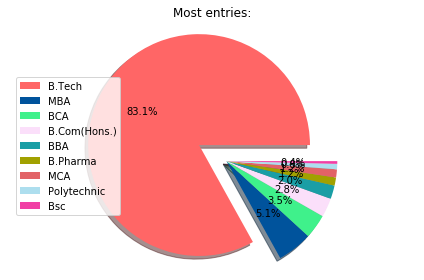

In [24]:
data_series = dataGLA['Course:'].value_counts()
labels = ['B.Tech','MBA','BCA','B.Com(Hons.)','BBA','B.Pharma','MCA','Polytechnic','Bsc']
colors = ['#ff6666','#00539c','#3ff18b','#fbdffa','#1a9ea5','#a1a100','#e26367','#addeee','#f13fa5']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0.2,0,0,0,0,0,0,0,0], autopct = '%1.1f%%',radius = 0.7)
plt.legend(patches, labels, loc = 6)
plt.title('Most entries:')
plt.axis('equal')
plt.tight_layout()

In [25]:
mySeries = dataGLA["Branch (if any):"].value_counts()

In [26]:
branch = list(mySeries.keys())

In [27]:
for i in branch:
    if i[0] == 'E' or i[0] == 'e':
        dataGLA['Branch (if any):'].replace(to_replace = i, value = 'Electronics Dept.', inplace = True)
    elif (i[0] == 'C' or i[0] == 'c') and ('s' in i or 'S' in i):
        dataGLA['Branch (if any):'].replace(to_replace = i, value = 'Computer Engineering and Applications Dept.', inplace = True)
    elif i[0] == 'M' or i[0] == 'm':
        dataGLA['Branch (if any):'].replace(to_replace = i, value = 'Mechanical Dept.', inplace = True)
    elif i[0] == 'C' or i[0] == 'c':
        dataGLA['Branch (if any):'].replace(to_replace = i, value = 'Civil Dept.', inplace = True)
    else:
        dataGLA['Branch (if any):'].replace(to_replace = i, value = 'Others', inplace = True)

In [28]:
dataGLA["Branch (if any):"].value_counts()

Computer Engineering and Applications Dept.    148
Electronics Dept.                               44
Mechanical Dept.                                40
Civil Dept.                                     15
Others                                           7
Name: Branch (if any):, dtype: int64

In [29]:
dataGLA['How much time you dedicate for your games?'].value_counts()

1 hr                                                                                                                                                  126
2 hr                                                                                                                                                   32
0                                                                                                                                                      11
None                                                                                                                                                    7
0 hr                                                                                                                                                    6
3 hr                                                                                                                                                    6
No time                                                                     

In [30]:
game_time = dataGLA['How much time you dedicate for your games?'].value_counts()

In [31]:
games = list(game_time.keys())
for i in games:
    if "no" in i or "NO" in i or "No" in i:
        dataGLA['How much time you dedicate for your games?'].replace(
            to_replace = i, value = 'NONE', inplace = True)
    elif '1' in i:
        dataGLA['How much time you dedicate for your games?'].replace(
            to_replace = i, value = 'Less than equal 1 Hr.', inplace = True)
    elif '2' in i:
        dataGLA['How much time you dedicate for your games?'].replace(
            to_replace = i, value = 'Less than equal 2 Hr.', inplace = True)
    elif '3' in i:
        dataGLA['How much time you dedicate for your games?'].replace(
            to_replace = i, value = 'Less than equal 3 Hr. ', inplace = True)
    else:
        dataGLA['How much time you dedicate for your games?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [32]:
dataGLA['How much time you dedicate for your games?'].value_counts()

Less than equal 1 Hr.     129
Others                     40
NONE                       39
Less than equal 2 Hr.      34
Less than equal 3 Hr.      12
Name: How much time you dedicate for your games?, dtype: int64

In [33]:
dataGLA['How much time you dedicate for your studies?'].value_counts()

2 hr                                                                                                     81
More than 3 hr                                                                                           55
1 hr                                                                                                     54
3 hr                                                                                                     42
0                                                                                                         5
8                                                                                                         2
Only During the classes 6 hr                                                                              1
Approx. 1 hr. On holidays                                                                                 1
Depends                                                                                                   1
20 mins/day                 

In [34]:
study_time = dataGLA['How much time you dedicate for your studies?'].value_counts()

In [35]:
studies = list(study_time.keys())
for i in studies:
    if "no" in i or "NO" in i or "No" in i:
        dataGLA['How much time you dedicate for your studies?'].replace(
            to_replace = i, value = 'NONE', inplace = True)
    elif '1' in i:
        dataGLA['How much time you dedicate for your studies?'].replace(
            to_replace = i, value = 'Less than equal 1 Hr.', inplace = True)
    elif '2' in i:
        dataGLA['How much time you dedicate for your studies?'].replace(
            to_replace = i, value = 'Less than equal 2 Hr.', inplace = True)
    elif '3' in i:
        dataGLA['How much time you dedicate for your studies?'].replace(
            to_replace = i, value = 'Less than equal 3 Hr.', inplace = True)
    else:
        dataGLA['How much time you dedicate for your studies?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [36]:
dataGLA['How much time you dedicate for your studies?'].value_counts()

Less than equal 3 Hr.    97
Less than equal 2 Hr.    83
Less than equal 1 Hr.    56
Others                   16
NONE                      2
Name: How much time you dedicate for your studies?, dtype: int64

# Insight 2 
### Time dedicated towards studies is more as compared to games 

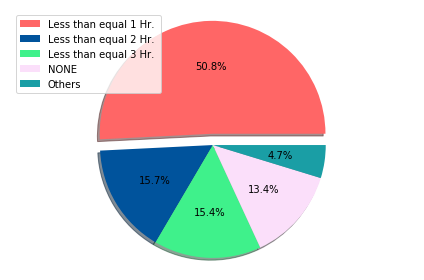

In [37]:
data_series = dataGLA['How much time you dedicate for your games?'].value_counts()
labels = dataGLA['How much time you dedicate for your games?'].value_counts().keys().sort_values()
colors = ['#ff6666','#00539c','#3ff18b','#fbdffa','#1a9ea5']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0.1,0,0,0,0], autopct = "%1.1f%%")
plt.legend(patches, labels, loc = 2)
plt.axis('equal')
plt.tight_layout()

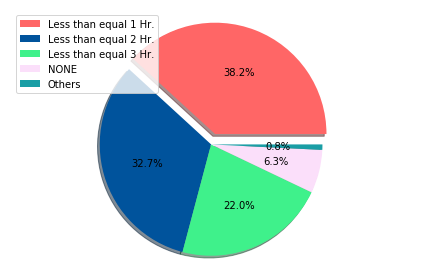

In [38]:
data_series = dataGLA['How much time you dedicate for your studies?'].value_counts()
labels = dataGLA['How much time you dedicate for your studies?'].value_counts().keys().sort_values()
colors = ['#ff6666','#00539c','#3ff18b','#fbdffa','#1a9ea5']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0.1,0,0,0,0], autopct = "%1.1f%%")
plt.legend(patches, labels, loc = 2)
plt.axis('equal')
plt.tight_layout()

Text(0.5,0.98,'Categorical Plotting')

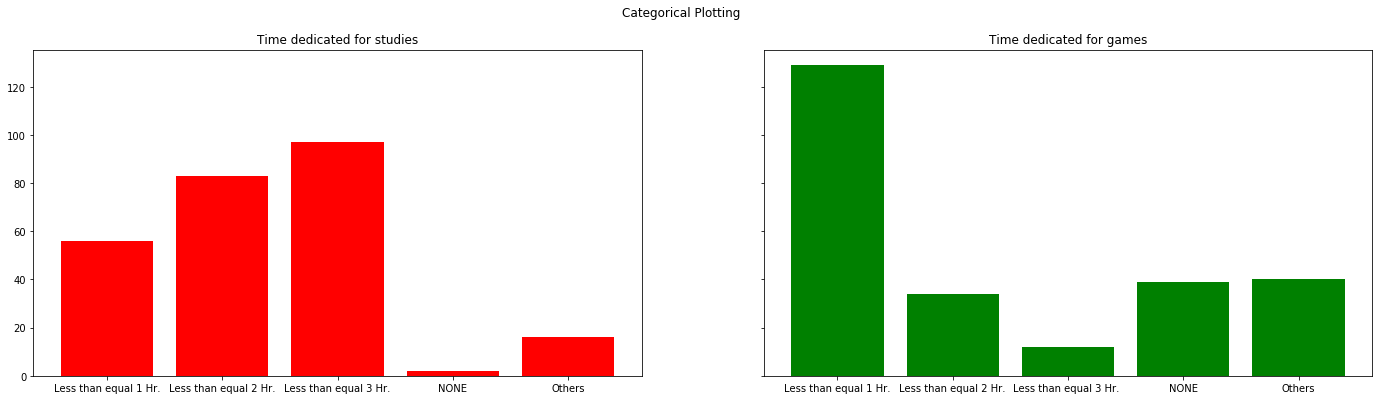

In [39]:
from collections import OrderedDict
study = dataGLA['How much time you dedicate for your studies?'].value_counts()
game = dataGLA['How much time you dedicate for your games?'].value_counts()
d1 = study.to_dict(OrderedDict)
d2 = game.to_dict(OrderedDict)
n1 = list(d1.keys())
v1 = list(d1.values())
n2 = list(d2.keys())
v2 = list(d2.values())
 
fig, axs = plt.subplots(1, 2, figsize=(24, 6), sharey = True)
axs[0].bar(n1, v1, color = 'red')
axs[0].set_title("Time dedicated for studies")
axs[1].bar(n2, v2, color = 'green')
axs[1].set_title("Time dedicated for games")
fig.suptitle('Categorical Plotting')

## Conclusion:
### Good

# Insight 3
### Only 1hr. for games indoor/outdoor

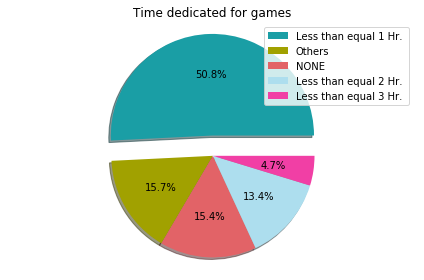

In [40]:
data_series = dataGLA['How much time you dedicate for your games?'].value_counts()
labels = dataGLA['How much time you dedicate for your games?'].value_counts().keys()
colors = ['#1a9ea5','#a1a100','#e26367','#addeee','#f13fa5']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0.2,0,0,0,0], autopct = "%1.1f%%")
plt.legend(patches, labels, loc = 'best')
plt.title("Time dedicated for games")
plt.axis('equal')
plt.tight_layout()

## Conclusion:
### More awareness towards sports etc.

In [41]:
dataGLA['Currently staying at:'].value_counts()

Hostel                  190
Home(with parents)       44
Rented room              13
Home(with relatives)      6
0                         1
Name: Currently staying at:, dtype: int64

In [42]:
dataGLA['Currently staying at:'].replace(to_replace = '0', value = 'Hostel', inplace = True)

### As we can see most of the students are hostellers

In [43]:
dataGLA['Currently staying at:'].value_counts()

Hostel                  191
Home(with parents)       44
Rented room              13
Home(with relatives)      6
Name: Currently staying at:, dtype: int64

In [44]:
dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts()

No                                                                            173
Yes                                                                            71
0                                                                               2
No                                                                              1
nota                                                                            1
not interested                                                                  1
yes i participate in competitive exams but not related to any coding            1
Because don't know what to do there                                             1
sometimes                                                                       1
I like to go in workshops , Now they have stopped it for 1st year students      1
I participated in gpat exams related to pharmacy                                1
Name: Do you participate in competitive exams such as hackathons, idea generation, codechef?, dtyp

In [45]:
for i in dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts().keys():
    if 'Yes' in i:
        dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].replace(to_replace = i, value = 'Yes', inplace = True)
    elif 'No' in i or 'not' in i:
        dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].replace(to_replace = i, value = 'No', inplace = True)
    else:
        dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].replace(to_replace = i, value = 'Others', inplace = True)
dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts()

No        178
Yes        71
Others      5
Name: Do you participate in competitive exams such as hackathons, idea generation, codechef?, dtype: int64

In [46]:
val = list(dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts())
key = dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts().keys()

# Insight 4
### Do students participate in competitive exams, online coding competitions 

Text(0.5,1,'Do students participate in competitive exams:')

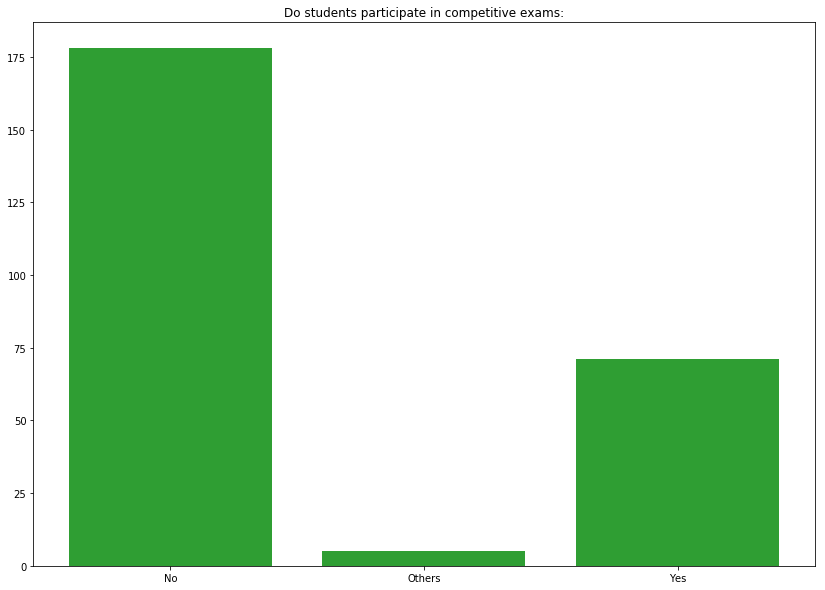

In [47]:
compete = dataGLA['Do you participate in competitive exams such as hackathons, idea generation, codechef?'].value_counts()
d1 = compete.to_dict(OrderedDict)
n1 = list(d1.keys())
v1 = list(d1.values())
 
fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey = True)
axs.bar(n1, v1, color = '#2f9e33')
axs.set_title("Do students participate in competitive exams:")

## Conclusion
### Students should participate in various hackathons, attend workshops and watch webinars etc.

In [48]:
dataGLA['Are you certified in any of the given language?'].value_counts()

C/C++                                                            67
No                                                               38
Java                                                             31
Python                                                           17
no                                                               16
R                                                                15
None                                                              7
Php                                                               3
NO                                                                3
nil                                                               2
No certificate                                                    2
none                                                              2
No                                                                2
Android                                                           2
php                                             

In [49]:
certi = list(dataGLA['Are you certified in any of the given language?'].value_counts().keys())
for i in certi:
    if "no" in i or "NO" in i or "No" in i:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'No/Not Intrested', inplace = True)
    elif 'C++' in i or i[0] == 'C' or i[0] == 'c':
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'C/C++', inplace = True)
    elif 'Java' in i or 'java' in i:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'Java', inplace = True)
    elif 'ndroid' in i:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'Android', inplace = True)
    elif 'ython' in i:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'Python', inplace = True)
    elif 'HTML' in i or 'CSS' in i or 'WEB' in i or 'web' in i or 'Web' in i:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'Web Technologies', inplace = True)
    else:
        dataGLA['Are you certified in any of the given language?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [50]:
dataGLA['Are you certified in any of the given language?'].value_counts()

No/Not Intrested    100
C/C++                71
Java                 33
Others               27
Python               18
Android               4
Web Technologies      1
Name: Are you certified in any of the given language?, dtype: int64

# Insight 5
### Certified in any technology/field

Text(0.5,0.98,'Categorical Plotting')

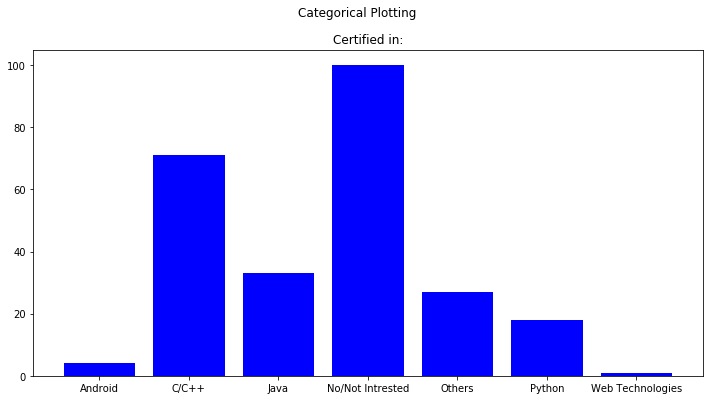

In [51]:
cert = dataGLA['Are you certified in any of the given language?'].value_counts()
d3 = cert.to_dict(OrderedDict)

n3 = list(d3.keys())
v3 = list(d3.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 6))
axs.bar(n3, v3, color = 'blue')
axs.set_title('Certified in:')
fig.suptitle('Categorical Plotting')

## Conclusion:
### Most of the students are not certified in any field/technology

In [52]:
dataGLA['Preferable websites for doing extra courses :'].value_counts()

Udemy                                          58
Datacamp                                       48
Sanfoundary                                    26
Coursera                                       25
No                                              8
no                                              7
Option 5                                        5
None                                            4
none                                            3
Nptel                                           3
hacker rank                                     2
Edx                                             2
NPTEL                                           2
Don't know                                      2
No one                                          2
...                                             1
Not interested                                  1
Geeks for geeks                                 1
Stack Overflow                                  1
edx                                             1


In [53]:
websites = list(dataGLA['Preferable websites for doing extra courses :'].value_counts().keys())
for i in websites:
    if "no" in i or "NO" in i or "No" in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'None', inplace = True)
    elif 'Udemy' in i or 'udemy' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Udemy', inplace = True)
    elif 'Datacamp' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Datacamp', inplace = True)
    elif 'Sanfoundary' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Sanfoundary', inplace = True)
    elif 'Coursera' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Coursera', inplace = True)
    elif 'tube' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'YouTube', inplace = True)
    elif 'Coursera' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Coursera', inplace = True)
    elif 'Udacity' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Udacity', inplace = True)
    elif 'NPTEL' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'NPTEL', inplace = True)
    elif 'geeks' in i:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'GeeksForGeeks', inplace = True)
    else:
        dataGLA['Preferable websites for doing extra courses :'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [54]:
dataGLA['Preferable websites for doing extra courses :'].value_counts()

Udemy            59
Datacamp         49
Others           46
None             36
Sanfoundary      26
Coursera         26
YouTube           4
NPTEL             3
GeeksForGeeks     3
Udacity           2
Name: Preferable websites for doing extra courses :, dtype: int64

# Insight 6
### Preferable websities for doing online courses


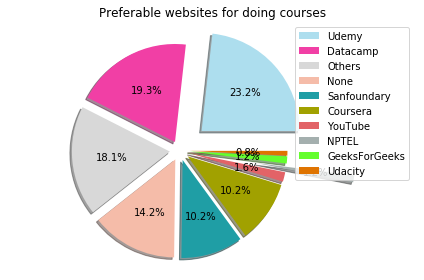

In [55]:
data_series = dataGLA['Preferable websites for doing extra courses :'].value_counts()
labels = dataGLA['Preferable websites for doing extra courses :'].value_counts().keys()
colors = ['#addeee','#f13fa5','#D8D8D8','#F5BCA9','#1f9ea5','#a1a100','#e26367','#a4afAE','#64FE2E','#DF7401']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.8,0.1,0.1], autopct = "%1.1f%%",startangle = 360)
plt.legend(patches, labels, loc = 'best')
plt.title("Preferable websites for doing courses")
plt.axis('equal')
plt.tight_layout()

## Conclusion:
### As we see students do courses on platforms like, Udemy ---paid

In [56]:
dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].value_counts()

Any number of companies but at least one core company.                                                              106
Allowed to sit for at least 2 companies                                                                              47
Allowed to sit for at least 2 companies and 1 core company                                                           46
Allowed to sit for at least 3 companies and 1 core company                                                           39
No                                                                                                                    3
1 company and 1core company must                                                                                      1
yea                                                                                                                   1
i am confused about it                                                                                                1
Yes ofcourse,if one does not want to joi

In [57]:
job = list(dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].value_counts().keys())
for i in job:
    if 'one core' in i:
        dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].replace(
            to_replace = i, value = 'at least 1 Core Company', inplace = True)
    elif 'Allowed to sit for at least 2 companies' in i:
        dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].replace(
            to_replace = i, value = 'at least 2 Core Company', inplace = True)
    elif '2 compani' in i and '1 core' in i:
        dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].replace(
            to_replace = i, value = 'at least 2 Company 1 Core', inplace = True)
    elif '3 compani' in i and '1 core' in i:
        dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].replace(
            to_replace = i, value = 'at least 3 Company 1 Core', inplace = True)
    else:
        dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [58]:
dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].value_counts()

at least 1 Core Company      106
at least 2 Core Company       93
at least 3 Company 1 Core     39
Others                        16
Name: Would you like an amendment in the University policy of 1 student 1 job?, dtype: int64

# Insight 7
### Statisfied with University's policy of 1 Student 1 Job

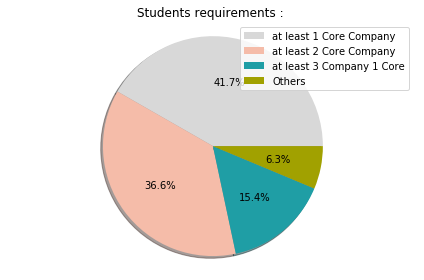

In [59]:
data_series = dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].value_counts()
labels = dataGLA['Would you like an amendment in the University policy of 1 student 1 job?'].value_counts().keys()
colors = ['#D8D8D8','#F5BCA9','#1f9ea5','#a1a100']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0,0,0,0], autopct = "%1.1f%%",startangle = 360)
plt.legend(patches, labels, loc = 'best')
plt.title("Students requirements : ")
plt.axis('equal')
plt.tight_layout()

## Conclusion:
### Despite the fact that, students are satisfied with University's policy
### but there are about 36.6% who wants to sit in at-least 2 core companies.

In [60]:
dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].value_counts()

School type learning                                                                                                                                                                93
Passionate for placement                                                                                                                                                            92
Passionate for admission                                                                                                                                                            34
Passionate for Learning                                                                                                                                                             18
Prefers only admission not studies                                                                                                                                                   1
School type learning , spoon feeding and impractical                                 

In [61]:
current = list(dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].value_counts().keys())
for i in current:
    if 'School' in i or 'school' in i:
        dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].replace(
            to_replace = i, value = 'School type learning', inplace = True)
    elif 'placement' in i:
        dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].replace(
            to_replace = i, value = 'Passionate for placement', inplace = True)
    elif 'admission' in i:
        dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].replace(
            to_replace = i, value = 'Passionate for admission', inplace = True)
    elif 'Learning' in i or 'learning' in i:
        dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].replace(
            to_replace = i, value = 'Passionate for Learning', inplace = True)
    else:
        dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [62]:
dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].value_counts()

School type learning        95
Passionate for placement    94
Passionate for admission    35
Passionate for Learning     18
Others                      12
Name: What outlook of the University do you get from its current scenario and ongoing proceedings?, dtype: int64

In [63]:
dataGLA['What style of teaching do you prefer?'].value_counts()

Ppt +blackboard                                                                                                                                       152
Blackboard                                                                                                                                             51
Excerpts from the books or technical paper reading in classroom                                                                                        26
Ppt                                                                                                                                                    11
Live test and learn, teacher demonstrating on projector and students practicing then and there                                                          1
practical study in open environment with some live examples                                                                                             1
Digital learning                                                            

In [64]:
teaching = list(dataGLA['What style of teaching do you prefer?'].value_counts().keys())
for i in teaching:
    if 'Ppt' in i and 'blackboard' in i:
        dataGLA['What style of teaching do you prefer?'].replace(
            to_replace = i, value = 'PPT + Blackboard', inplace = True)
    elif 'Blackboard' in i or 'blackboard' in i:
        dataGLA['What style of teaching do you prefer?'].replace(
            to_replace = i, value = 'Blackboard', inplace = True)
    elif 'book' in i:
        dataGLA['What style of teaching do you prefer?'].replace(
            to_replace = i, value = 'Books', inplace = True)
    elif 'Ppt' in i or 'ppt':
        dataGLA['What style of teaching do you prefer?'].replace(
            to_replace = i, value = 'PPT', inplace = True)
    else:
        dataGLA['What style of teaching do you prefer?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [65]:
dataGLA['What style of teaching do you prefer?'].value_counts()

PPT + Blackboard    152
Blackboard           53
Books                26
PPT                  23
Name: What style of teaching do you prefer?, dtype: int64

In [66]:
dataGLA['What medium of study you prefer for regular studies?'].value_counts()

Internet                                                     122
Books at Home                                                 63
Notes of class                                                51
notes of class , internet                                      1
All of the above, should not depend on only one medium         1
Internet, books, and notes                                     1
all the above things should come together                      1
Books, notes of class, internet. Everything is important.      1
All                                                            1
Books                                                          1
Books, internet n notes of class                               1
Friends                                                        1
both notes and internet                                        1
Online                                                         1
0                                                              1
All of the above mentione

In [67]:
medium = list(dataGLA['What medium of study you prefer for regular studies?'].value_counts().keys())
for i in medium:
    if 'Internet' in i:
        dataGLA['What medium of study you prefer for regular studies?'].replace(
            to_replace = i, value = 'Internet', inplace = True)
    elif 'notes' in i or 'Notes' in i:
        dataGLA['What medium of study you prefer for regular studies?'].replace(
            to_replace = i, value = 'Notes from Class', inplace = True)
    elif 'book' in i or 'Books' in i or 'books' in i:
        dataGLA['What medium of study you prefer for regular studies?'].replace(
            to_replace = i, value = 'Books', inplace = True)
    elif 'all' in i or 'All' in i:
        dataGLA['What medium of study you prefer for regular studies?'].replace(
            to_replace = i, value = 'All', inplace = True)
    else:
        dataGLA['What medium of study you prefer for regular studies?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [68]:
dataGLA['What medium of study you prefer for regular studies?'].value_counts()

Internet            123
Books                65
Notes from Class     55
All                   6
Others                5
Name: What medium of study you prefer for regular studies?, dtype: int64

# Insight 8
### Comparision b/w Outlook of University, Teaching Style and Medium of Study

Text(0.5,0.98,'Categorical Plotting')

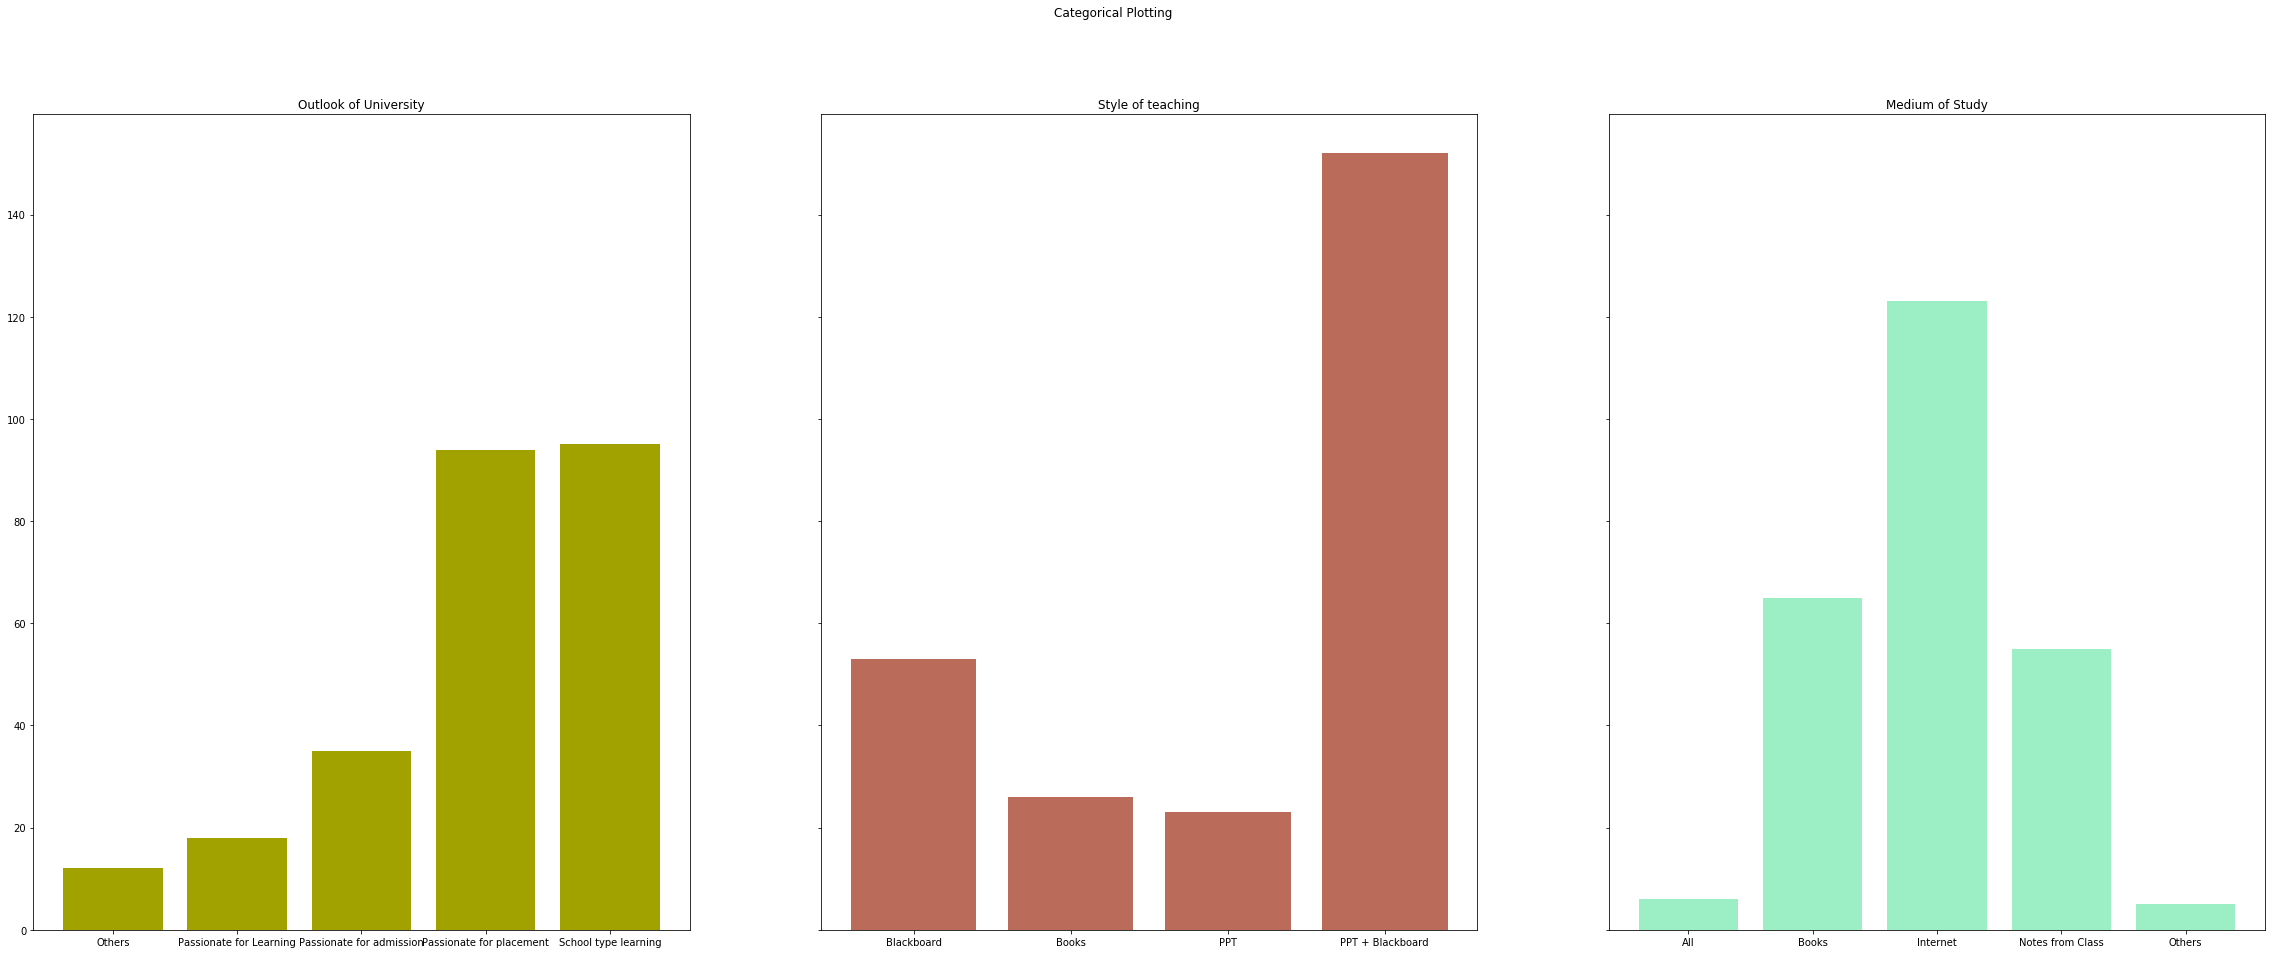

In [69]:
scenario = dataGLA['What outlook of the University do you get from its current scenario and ongoing proceedings?'].value_counts()
style = dataGLA['What style of teaching do you prefer?'].value_counts()
medium = dataGLA['What medium of study you prefer for regular studies?'].value_counts()
d1 = scenario.to_dict(OrderedDict)
d2 = style.to_dict(OrderedDict)
d3 = medium.to_dict(OrderedDict)
n1 = list(d1.keys())
v1 = list(d1.values())
n2 = list(d2.keys())
v2 = list(d2.values())
n3 = list(d3.keys())
v3 = list(d3.values())
 
fig, axs = plt.subplots(1, 3, figsize=(40, 15), sharey = True)
axs[0].bar(n1, v1, color = '#a1a100')
axs[0].set_title("Outlook of University")
axs[1].bar(n2, v2, color = '#ba6b5a')
axs[1].set_title("Style of teaching")
axs[2].bar(n3, v3, color = '#9ceec4')
axs[2].set_title("Medium of Study")
fig.suptitle('Categorical Plotting')

## Conclusion:
### 1. As we see that majority of the students say that the college is only passionate for placement and school type learning
### 2. Students want to be taught with PPT + BlackBoard
### 3. As we see the bar graph, we see students mostly study from internet but sometimes the information on the internet cannot be reliable, so they should also consider books.

In [70]:
dataGLA['How frequently you visit to library?'].value_counts()

Weekly                                                       108
Ocassionally                                                  73
Daily                                                         36
Monthly                                                       26
Never                                                          4
2-3 times a week                                               2
Room study prefred                                             1
only when i need books cause i prefer to study at my room      1
0                                                              1
never                                                          1
no                                                             1
Name: How frequently you visit to library?, dtype: int64

In [71]:
for i in dataGLA['How frequently you visit to library?'].value_counts().keys():
    if 'eek' in i:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Weekly', inplace = True)
    elif 'cassionally' in i:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Ocassionally', inplace = True)
    elif 'onthly' in i:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Monthly', inplace = True)
    elif 'aily' in i:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Daily', inplace = True)
    elif 'never' in i or 'no' in i:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Never', inplace = True)
    else:
        dataGLA['How frequently you visit to library?'].replace(to_replace = i, value = 'Other', inplace = True)
dataGLA['How frequently you visit to library?'].value_counts()

Weekly          110
Ocassionally     73
Daily            36
Monthly          26
Other             7
Never             2
Name: How frequently you visit to library?, dtype: int64

# Insight 9
### How frequently students visit library

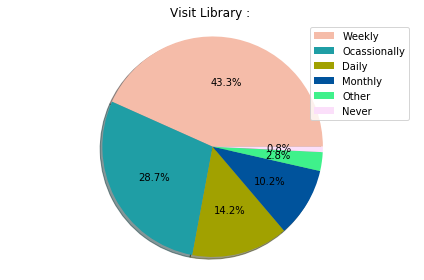

In [72]:
data_series = dataGLA['How frequently you visit to library?'].value_counts()
labels = dataGLA['How frequently you visit to library?'].value_counts().keys()
colors = ['#F5BCA9','#1f9ea5','#a1a100','#00539c','#3ff18b','#fbdffa']
patches, texts, p = plt.pie(data_series,colors = colors,shadow = True,explode = [0,0,0,0,0,0], autopct = "%1.1f%%",startangle = 360)
plt.legend(patches, labels, loc = 'best')
plt.title("Visit Library : ")
plt.axis('equal')
plt.tight_layout()

## Conclusion:
### As we see the pie chart it is quite clear that 43.3% of students visits weekly which is good and can be improved further

In [73]:
dataGLA['How much time you dedicate for improving your coding skills?'].value_counts()

1 hr                                                                                                      122
2 hr                                                                                                       29
More than 3 hr                                                                                             15
0                                                                                                           9
3 hr                                                                                                        7
No                                                                                                          7
None                                                                                                        6
none                                                                                                        5
no time                                                                                                     3
no        

In [74]:
codingtime = list(dataGLA['How much time you dedicate for improving your coding skills?'].value_counts().keys())
for i in codingtime:
    if "no" in i or "NO" in i or "No" in i:
        dataGLA['How much time you dedicate for improving your coding skills?'].replace(
            to_replace = i, value = 'NONE', inplace = True)
    elif '1' in i:
        dataGLA['How much time you dedicate for improving your coding skills?'].replace(
            to_replace = i, value = '<= 1 Hours', inplace = True)
    elif '2' in i:
        dataGLA['How much time you dedicate for improving your coding skills?'].replace(
            to_replace = i, value = '<= 2 Hours', inplace = True)
    elif '3' in i:
        dataGLA['How much time you dedicate for improving your coding skills?'].replace(
            to_replace = i, value = '<= 3 Hours ', inplace = True)
    else:
        dataGLA['How much time you dedicate for improving your coding skills?'].replace(
            to_replace = i, value = 'Others', inplace = True)

In [75]:
dataGLA['How much time you dedicate for improving your coding skills?'].value_counts()

<= 1 Hours     126
NONE            44
Others          32
<= 2 Hours      29
<= 3 Hours      23
Name: How much time you dedicate for improving your coding skills?, dtype: int64

In [76]:
dataGLA['Do you like coding?'].value_counts()

Yes                                                      162
No                                                        82
I m not a computer science student                         1
I like Automation. likes to play with Servos,Robotics      1
On basic level                                             1
I like cad designing.                                      1
Sometime                                                   1
0                                                          1
50-50                                                      1
depends upon conditions                                    1
a little bit only                                          1
I like bt I am too much week                               1
Name: Do you like coding?, dtype: int64

In [77]:
for i in dataGLA['Do you like coding?'].value_counts().keys():
    if i == 'Yes':
        dataGLA['Do you like coding?'].replace(to_replace = i, value = 'Yes', inplace = True)
    elif 'No' in i or 'not' in i:
        dataGLA['Do you like coding?'].replace(to_replace = i, value = 'No', inplace = True)
    else:
        dataGLA['Do you like coding?'].replace(to_replace = i, value = 'Others', inplace = True)
dataGLA['Do you like coding?'].value_counts()

Yes       162
No         83
Others      9
Name: Do you like coding?, dtype: int64

# Insight 10
### All about coding

Text(0.5,0.98,'Coding')

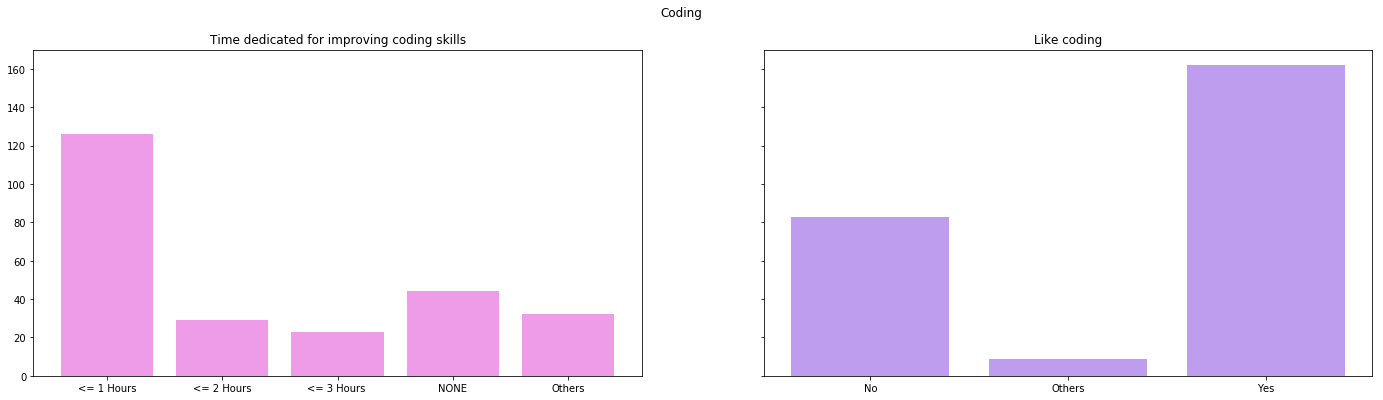

In [78]:
code = dataGLA['How much time you dedicate for improving your coding skills?'].value_counts()
like = dataGLA['Do you like coding?'].value_counts()
d1 = code.to_dict(OrderedDict)
d2 = like.to_dict(OrderedDict)
n1 = list(d1.keys())
v1 = list(d1.values())
n2 = list(d2.keys())
v2 = list(d2.values())
 
fig, axs = plt.subplots(1, 2, figsize=(24, 6), sharey = True)
axs[0].bar(n1, v1, color = '#ee9ce8')
axs[0].set_title("Time dedicated for improving coding skills")
axs[1].bar(n2, v2, color = '#be9cee')
axs[1].set_title("Like coding")
fig.suptitle('Coding')

## Conclusion:
### As we see the comparision b/w two graphs, we see that majority of the students "like" to do coding but they are not giving enough time towards coding, which as we know is the first and the foremost criteria for companies 

In [79]:
dataGLA['Should mini project labs start from 2nd year?'].value_counts()

Yes                                                                                                                                                                                                                       192
No                                                                                                                                                                                                                         54
Mini projects should start not labs                                                                                                                                                                                         1
I thing so                                                                                                                                                                                                                  1
We haven't any such type of labs project                                                                        

In [80]:
for i in dataGLA['Should mini project labs start from 2nd year?'].value_counts().keys():
    if 'Yes' == i:
        dataGLA['Should mini project labs start from 2nd year?'].replace(to_replace = i, value = 'Yes', inplace = True)
    elif 'No' == i:
        dataGLA['Should mini project labs start from 2nd year?'].replace(to_replace = i, value = 'No', inplace = True)
    else:
        dataGLA['Should mini project labs start from 2nd year?'].replace(to_replace = i, value = 'Others', inplace = True)
        
dataGLA['Should mini project labs start from 2nd year?'].value_counts()

Yes       192
No         54
Others      8
Name: Should mini project labs start from 2nd year?, dtype: int64

## Students wants to start working on mini project from 2nd year

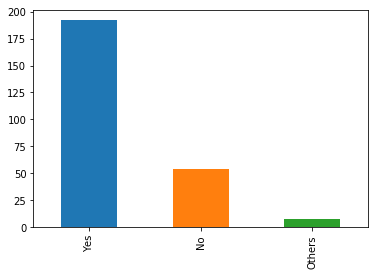

In [81]:
dataGLA['Should mini project labs start from 2nd year?'].value_counts().plot(kind = 'bar')

In [82]:
dataGLA['Are technical classes beneficial for you?'].value_counts()

Yes                                                                            186
No                                                                              49
Sometimes                                                                        2
question not clear                                                               1
avg.                                                                             1
less beneficial                                                                  1
Not required                                                                     1
no such classese                                                                 1
Yet not attended                                                                 1
till now our technical classes are very poor                                     1
We don't have technical classes for civil engineering students                   1
dont know                                                                        1
we h

In [83]:
for i in dataGLA['Are technical classes beneficial for you?'].value_counts().keys():
    if 'Yes' == i:
        dataGLA['Are technical classes beneficial for you?'].replace(to_replace = i, value = 'Yes', inplace = True)
    elif 'No' == i:
        dataGLA['Are technical classes beneficial for you?'].replace(to_replace = i, value = 'No', inplace = True)
    else:
        dataGLA['Are technical classes beneficial for you?'].replace(to_replace = i, value = 'Others', inplace = True)
        
dataGLA['Are technical classes beneficial for you?'].value_counts()

Yes       186
No         49
Others     19
Name: Are technical classes beneficial for you?, dtype: int64

## Undoubtedly, technical classes the most beneficial to us

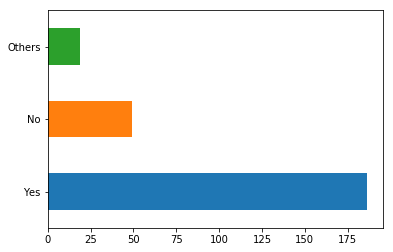

In [84]:
dataGLA['Are technical classes beneficial for you?'].value_counts().plot(kind = 'barh')

# Insight 11
### Demand of students to go with laptops in classroom

Text(0.5,1,'Demand of students\n To go with Laptops\n in Classroom')

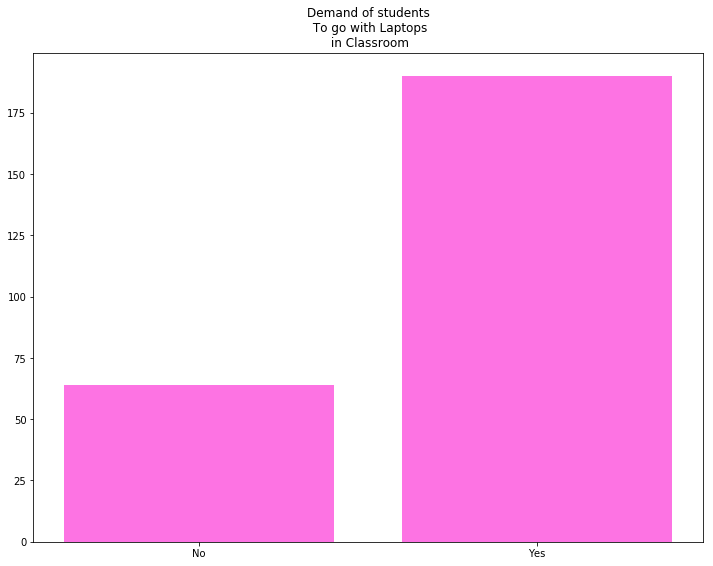

In [85]:
lappy = dataGLA['Would you prefer to go in classroom with laptops?'].value_counts()
d3 = lappy.to_dict(OrderedDict)

n3 = list(d3.keys())
v3 = list(d3.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 9))
axs.bar(n3, v3, color = '#fd73e3')
axs.set_title('Demand of students\n To go with Laptops\n in Classroom')

## Conclusion:
### We can see that above 60% of students want to go with laptops in classroom which should happen as we know, in many other universities carrying laptops to class is allowed. This will be more beneficial for us as we would implementing the part we are studying in classroom only

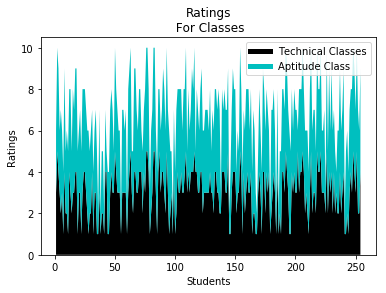

In [86]:
data = [i for i in range(1,255)]
plt.plot([], [], color = 'k' ,label = 'Technical Classes', linewidth = 5)
plt.plot([], [], color = 'c' ,label = 'Aptitude Class', linewidth = 5)

plt.stackplot(data,
              dataGLA['Give ratings to your technical classes.'],
              dataGLA['Give ratings to your aptitude classes.'],
              colors = ['k','c'], baseline = 'zero')
plt.xlabel('Students')
plt.ylabel('Ratings')
plt.title('Ratings\n For Classes')
plt.legend()

## Stackplot b/w ratings of technical and aptitude classes

Text(0.5,1,'Quality of Books in Library')

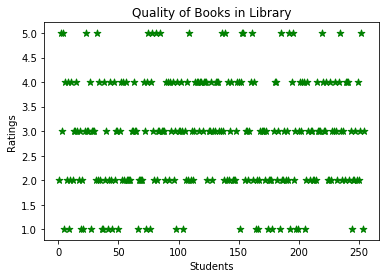

In [87]:
plt.scatter(data, dataGLA['Do you find the genre of books in library and their quality sufficient?'] ,label = 'Ratings given by each Student', color = 'g', s = 50, marker = "*", )
plt.xlabel('Students')
plt.ylabel('Ratings')
plt.title('Quality of Books in Library')
#plt.legend()

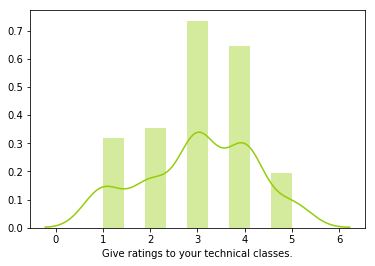

In [88]:
sns.distplot(dataGLA['Give ratings to your technical classes.'], bins = 9, color = '#94cc08')

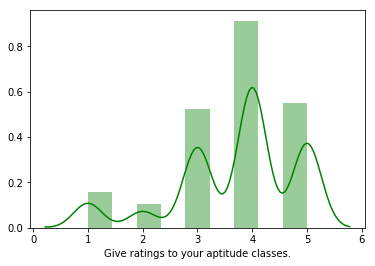

In [89]:
sns.distplot(dataGLA['Give ratings to your aptitude classes.'],bins = 9, color = 'g')

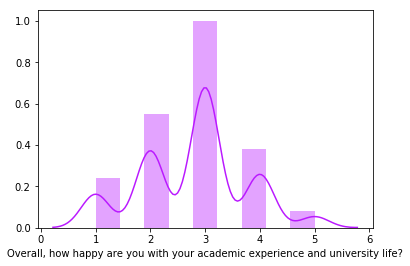

In [90]:
sns.distplot(dataGLA['Overall, how happy are you with your academic experience and university life?'],bins = 9,color = '#ba1aff')

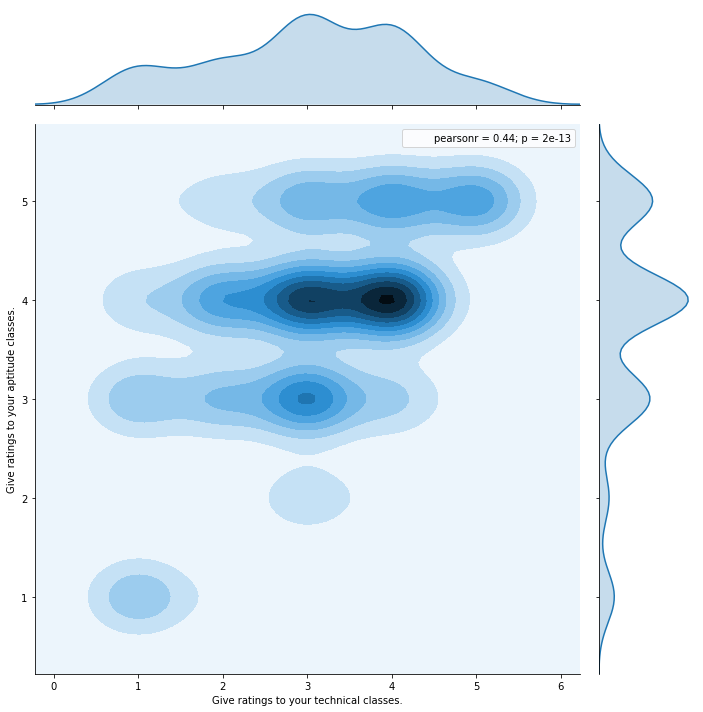

In [91]:
sns.jointplot(x = 'Give ratings to your technical classes.', y = 'Give ratings to your aptitude classes.', data = dataGLA, kind = 'kde', size = 10)

# Insight 12
### Comparision b/w Ratings

Text(0.5,0.98,'Ratings')

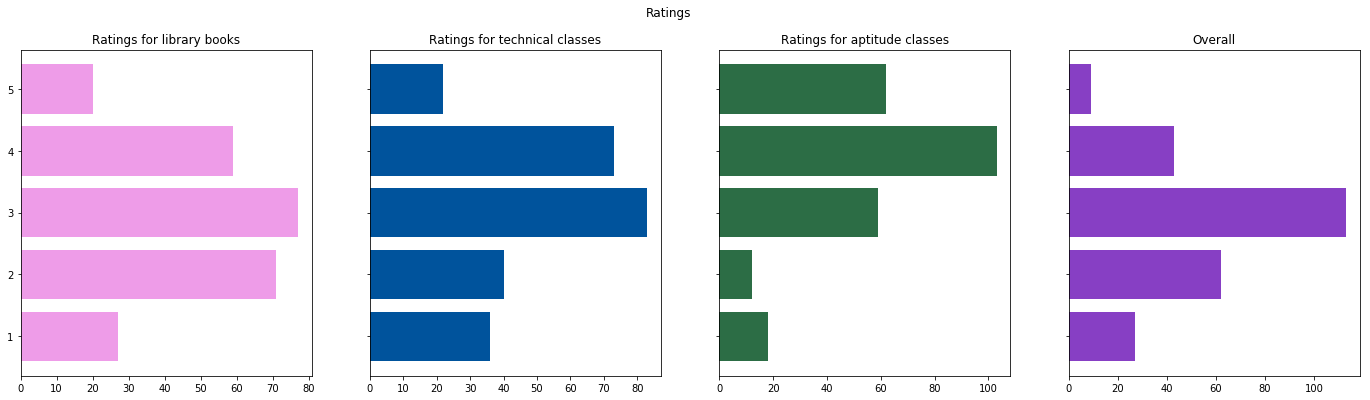

In [92]:
rate1 = dataGLA["Do you find the genre of books in library and their quality sufficient?"].value_counts()
rate2 = dataGLA["Give ratings to your technical classes."].value_counts()
rate3 = dataGLA["Give ratings to your aptitude classes."].value_counts()
rate4 = dataGLA["Overall, how happy are you with your academic experience and university life?"].value_counts()
d1 = rate1.to_dict(OrderedDict)
d2 = rate2.to_dict(OrderedDict)
d3 = rate3.to_dict(OrderedDict)
d4 = rate4.to_dict(OrderedDict)
k1 = list(d1.keys())
v1 = list(d1.values())
k2 = list(d2.keys())
v2 = list(d2.values())
k3 = list(d3.keys())
v3 = list(d3.values())
k4 = list(d4.keys())
v4 = list(d4.values())
 
fig, axs = plt.subplots(1, 4, figsize=(24, 6), sharey = True)
axs[0].barh(k1, v1, color = '#ee9ce8')
axs[0].set_title("Ratings for library books")
axs[1].barh(k2, v2, color = '#00539c')
axs[1].set_title("Ratings for technical classes")
axs[2].barh(k3, v3, color = '#2c6d45')
axs[2].set_title("Ratings for aptitude classes")
axs[3].barh(k4, v4, color = '#873fc4')
axs[3].set_title("Overall")
fig.suptitle('Ratings')

## Conclusion

In [93]:
dataGLA['Do you have interest in outdoor games?'].value_counts().keys()

Index(['Yes', 'No', 'Gym', 'BADMINTON', 'chess', 'INDOOR GAMES', 'Gyming',
       'basketball ', '0', 'Only on weekends', 'Not intrested',
       'Indoor game : table tennis', 'GYM, PUSH-UPS, MEDITATION',
       'only indoor game like call of duty and battlefield'],
      dtype='object')

In [94]:
for i in dataGLA['Do you have interest in outdoor games?'].value_counts().keys():
    if i == 'Yes':
        dataGLA['Do you have interest in outdoor games?'].replace(to_replace = i, value = 'Yes', inplace = True)
    elif i == 'No':
        dataGLA['Do you have interest in outdoor games?'].replace(to_replace = i, value = 'No', inplace = True)
    else:
        dataGLA['Do you have interest in outdoor games?'].replace(to_replace = i, value = 'Others', inplace = True)

dataGLA['Do you have interest in outdoor games?'].value_counts()

Yes       170
No         72
Others     12
Name: Do you have interest in outdoor games?, dtype: int64

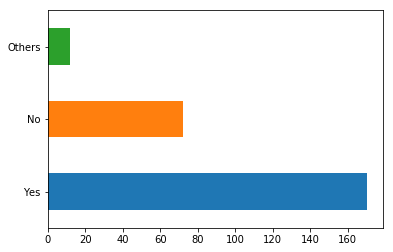

In [95]:
dataGLA['Do you have interest in outdoor games?'].value_counts().plot(kind = 'barh')

## Interest in outdoor games

Text(0.5,1,'Interest in outdoor games')

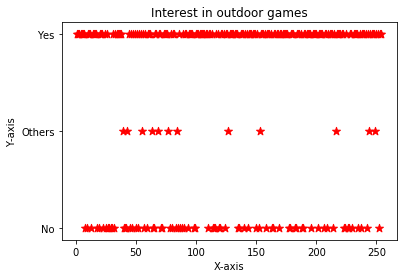

In [96]:
plt.scatter(data, dataGLA['Do you have interest in outdoor games?'], label = ' ', color = 'r', s = 70, marker = "*",)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Interest in outdoor games')
#plt.legend()


# FacetGrid using Multiple Regression

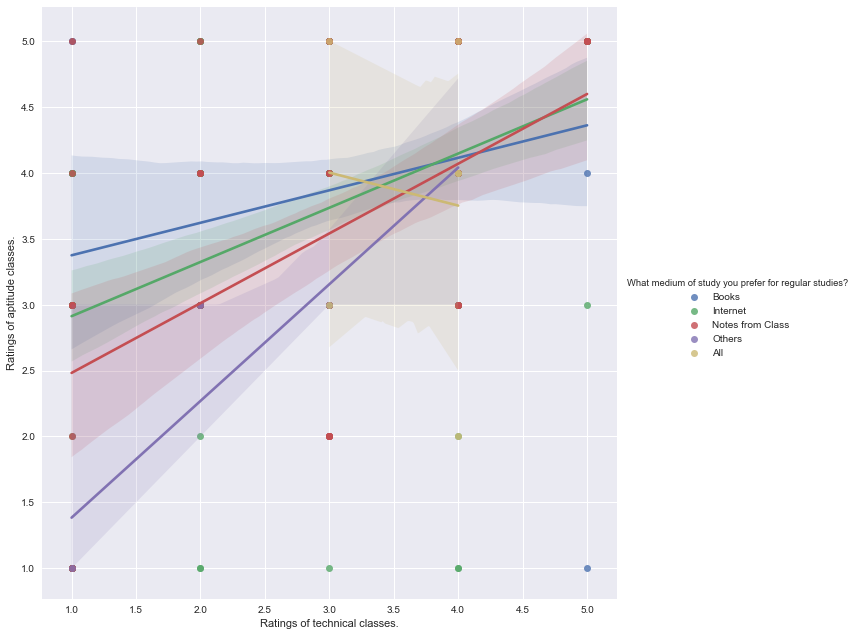

In [97]:
sns.set()
g = sns.lmplot(x="Give ratings to your technical classes.", y="Give ratings to your aptitude classes.", hue="What medium of study you prefer for regular studies?",
               truncate=True, size=9, data=dataGLA)
g.set_axis_labels("Ratings of technical classes.", "Ratings of aptitude classes.")

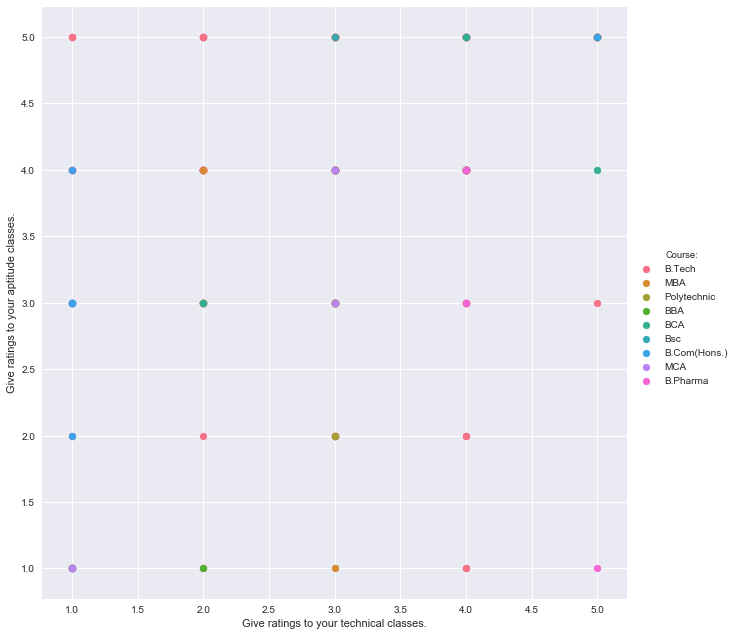

In [98]:
sns.FacetGrid(dataGLA, hue = 'Course:', size = 9)\
    .map(plt.scatter, 'Give ratings to your technical classes.', 'Give ratings to your aptitude classes.')\
    .add_legend()

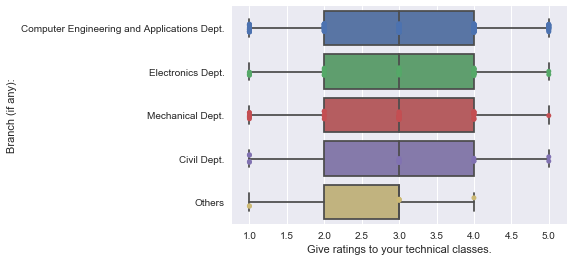

In [99]:
ax = sns.boxplot(x = 'Give ratings to your technical classes.', y = 'Branch (if any):', data = dataGLA)
ax = sns.stripplot(x = 'Give ratings to your technical classes.', y = 'Branch (if any):', data = dataGLA, jitter = True, edgecolor = 'gray')

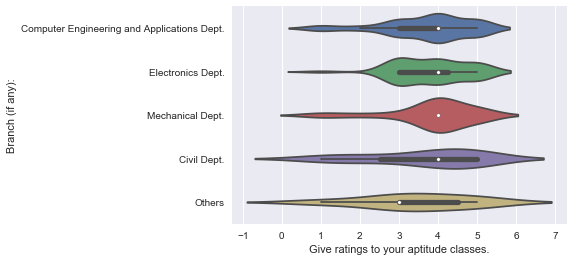

In [100]:
sns.violinplot(x = 'Give ratings to your aptitude classes.', y = 'Branch (if any):', data = dataGLA)

In [101]:
for i in dataGLA['Should there be courses introduced in University which provide earning while learning?'].value_counts().keys():
    if i == 'Yes':
        dataGLA['Should there be courses introduced in University which provide earning while learning?'].replace(to_replace = i, value = 1, inplace = True)
    elif i == 'No':
        dataGLA['Should there be courses introduced in University which provide earning while learning?'].replace(to_replace = i, value = 0, inplace = True)
        

In [102]:
dataGLA['Should there be courses introduced in University which provide earning while learning?'].value_counts()

1    224
0     30
Name: Should there be courses introduced in University which provide earning while learning?, dtype: int64

# Using Scikit Learn's Logistic Regression Model
# Predicting that
## Should there be courses introduced in University which provide earning while learning?

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

In [105]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataGLA, test_size = 0.2)

In [106]:
train.shape

(203, 37)

In [107]:
train['Should there be courses introduced in University which provide earning while learning?']

Timestamp
2018-03-17 09:21:10    1
2018-03-17 02:38:15    0
2018-03-16 21:52:26    1
2018-03-16 23:21:32    1
2018-03-16 21:55:50    1
2018-03-17 18:43:20    1
2018-03-16 22:00:26    1
2018-03-17 02:00:19    1
2018-03-16 22:06:49    1
2018-03-17 01:06:31    0
2018-03-19 15:43:50    1
2018-03-17 01:20:03    1
2018-03-22 14:31:54    0
2018-03-17 04:23:12    1
2018-03-17 23:45:42    1
2018-03-16 23:58:48    1
2018-03-21 04:12:13    1
2018-03-16 23:58:04    1
2018-03-20 13:43:46    1
2018-03-16 23:33:17    1
2018-03-19 03:35:31    1
2018-03-20 07:01:23    1
2018-03-16 21:53:35    1
2018-03-17 01:51:47    1
2018-03-16 21:53:40    1
2018-03-17 01:01:08    1
2018-03-20 14:20:22    1
2018-03-17 04:36:44    1
2018-03-18 04:06:49    1
2018-03-16 23:55:21    1
                      ..
2018-03-17 14:13:45    0
2018-03-17 05:10:48    0
2018-03-20 03:50:54    1
2018-03-17 17:32:35    1
2018-03-16 22:00:19    1
2018-03-20 01:04:36    1
2018-03-17 00:20:46    1
2018-03-17 01:22:21    0
2018-03-18 20:3

In [108]:
train_feat = train[['Do you find the genre of books in library and their quality sufficient?',
                     'Give ratings to your technical classes.',
                     'Give ratings to your aptitude classes.',
                     'Overall, how happy are you with your academic experience and university life?']].copy()
train_targ = train[['Should there be courses introduced in University which provide earning while learning?']]

In [109]:
train_feat.shape

(203, 4)

In [110]:
train_targ.shape

(203, 1)

In [111]:
type(train_targ)
type(train[['Should there be courses introduced in University which provide earning while learning?']])
train[['Should there be courses introduced in University which provide earning while learning?']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 2018-03-17 09:21:10 to 2018-03-17 02:26:33
Data columns (total 1 columns):
Should there be courses introduced in University which provide earning while learning?    203 non-null int64
dtypes: int64(1)
memory usage: 13.2 KB


In [112]:
lr.fit(train_feat, train_targ)

C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
lr.score(train_feat, train_targ)

0.8768472906403941

### Setting up testing dataset

In [115]:
test_feat = test[['Do you find the genre of books in library and their quality sufficient?',
                     'Give ratings to your technical classes.',
                     'Give ratings to your aptitude classes.',
                     'Overall, how happy are you with your academic experience and university life?']].copy()
test_targ = test[['Should there be courses introduced in University which provide earning while learning?']]

In [116]:
lr.score(train_feat, train_targ)

0.8768472906403941

In [117]:
lr.score(test_feat, test_targ)

0.8627450980392157

In [118]:
pwd

'C:\\Users\\Mayank\\Desktop\\S3Insights'

In [119]:
dataGLA.to_csv("Cleaned.csv")

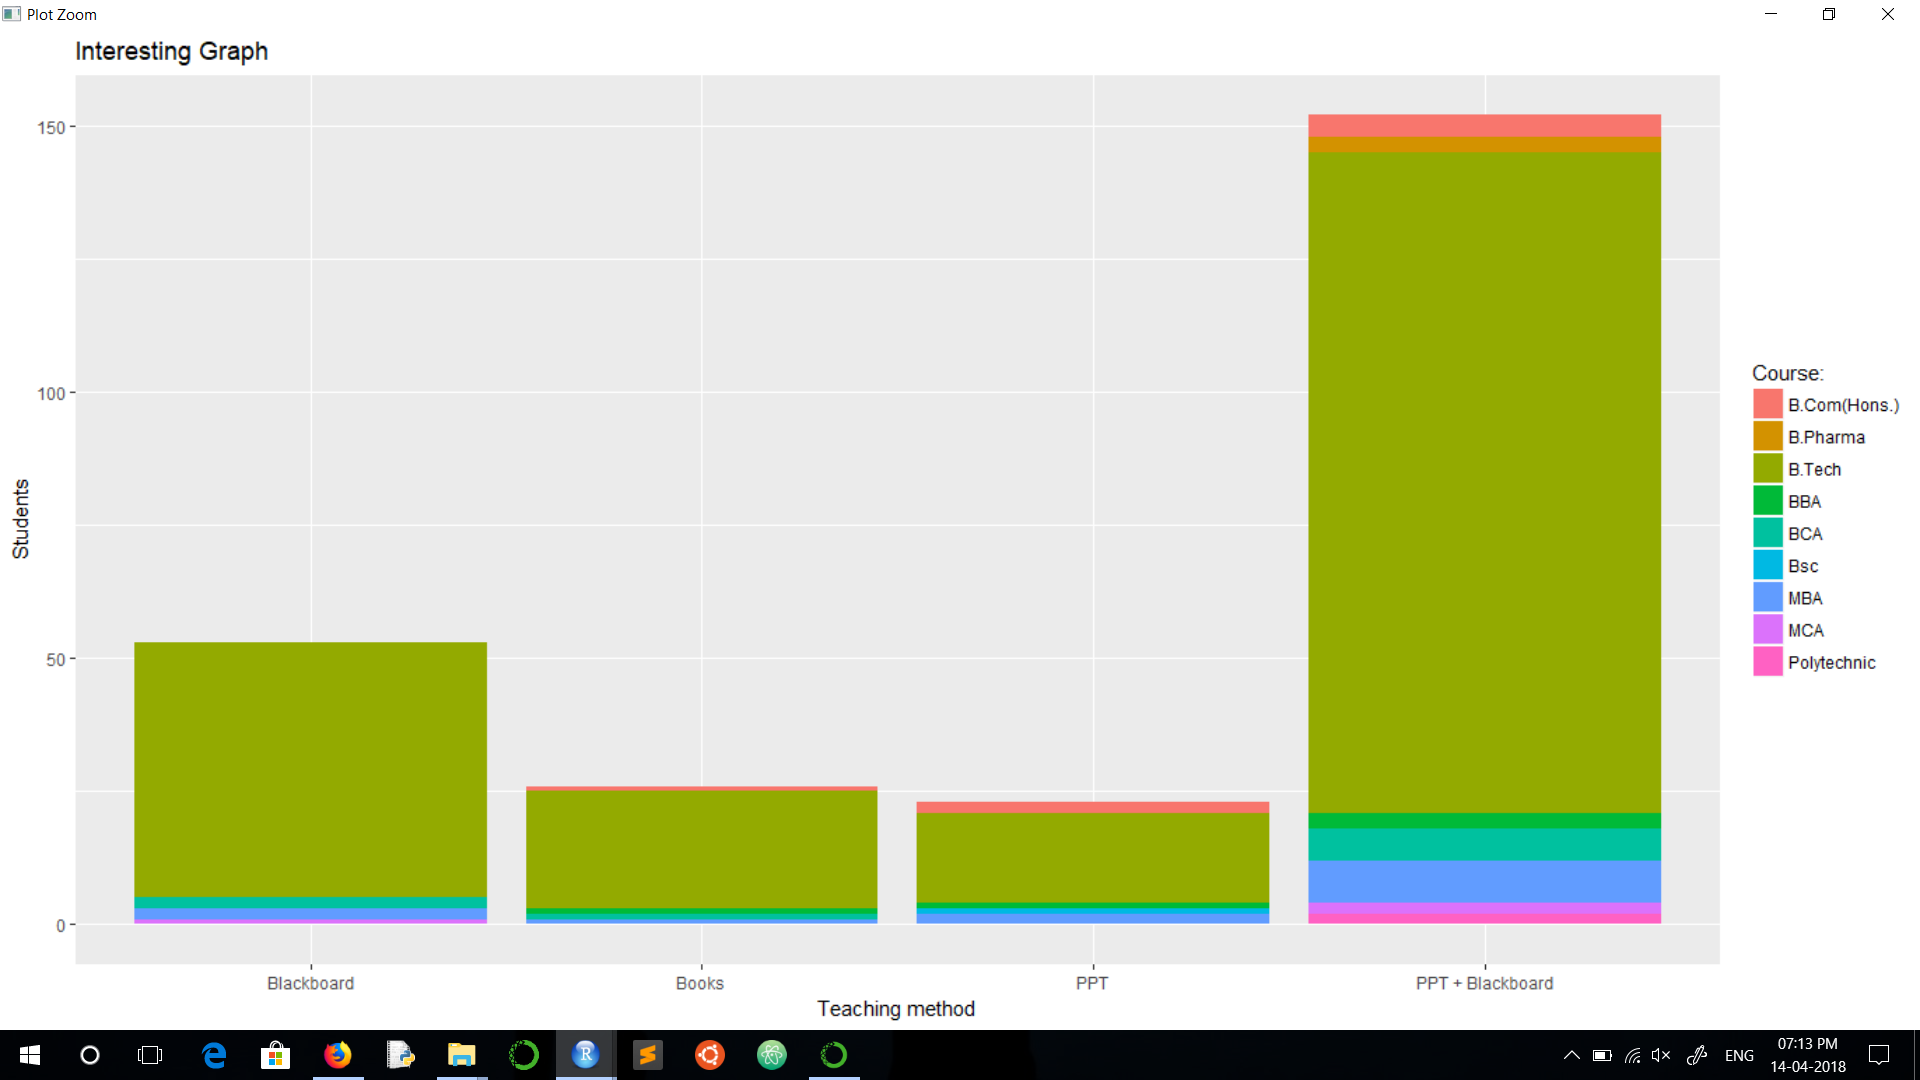

In [1]:
from IPython.display import Image
Image(filename='img1.png')

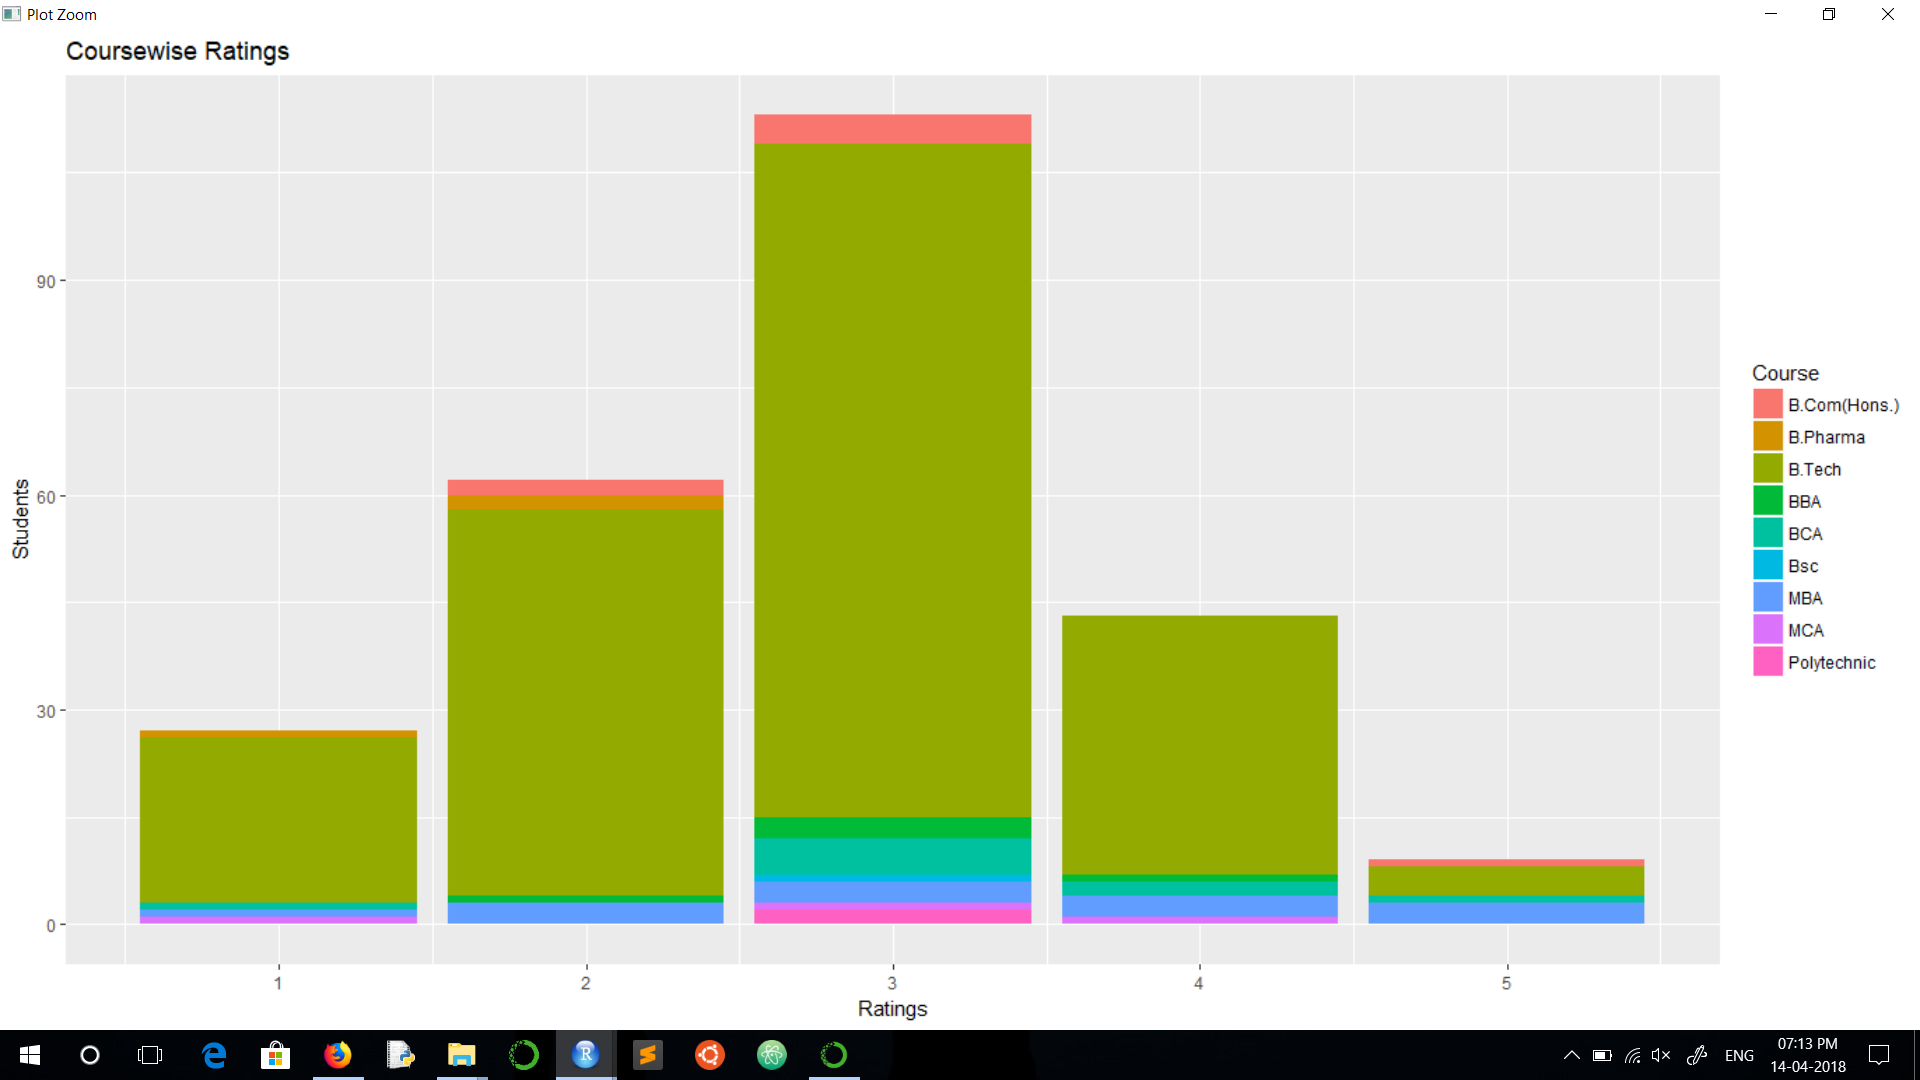

In [2]:
from IPython.display import Image
Image(filename='img2.png')

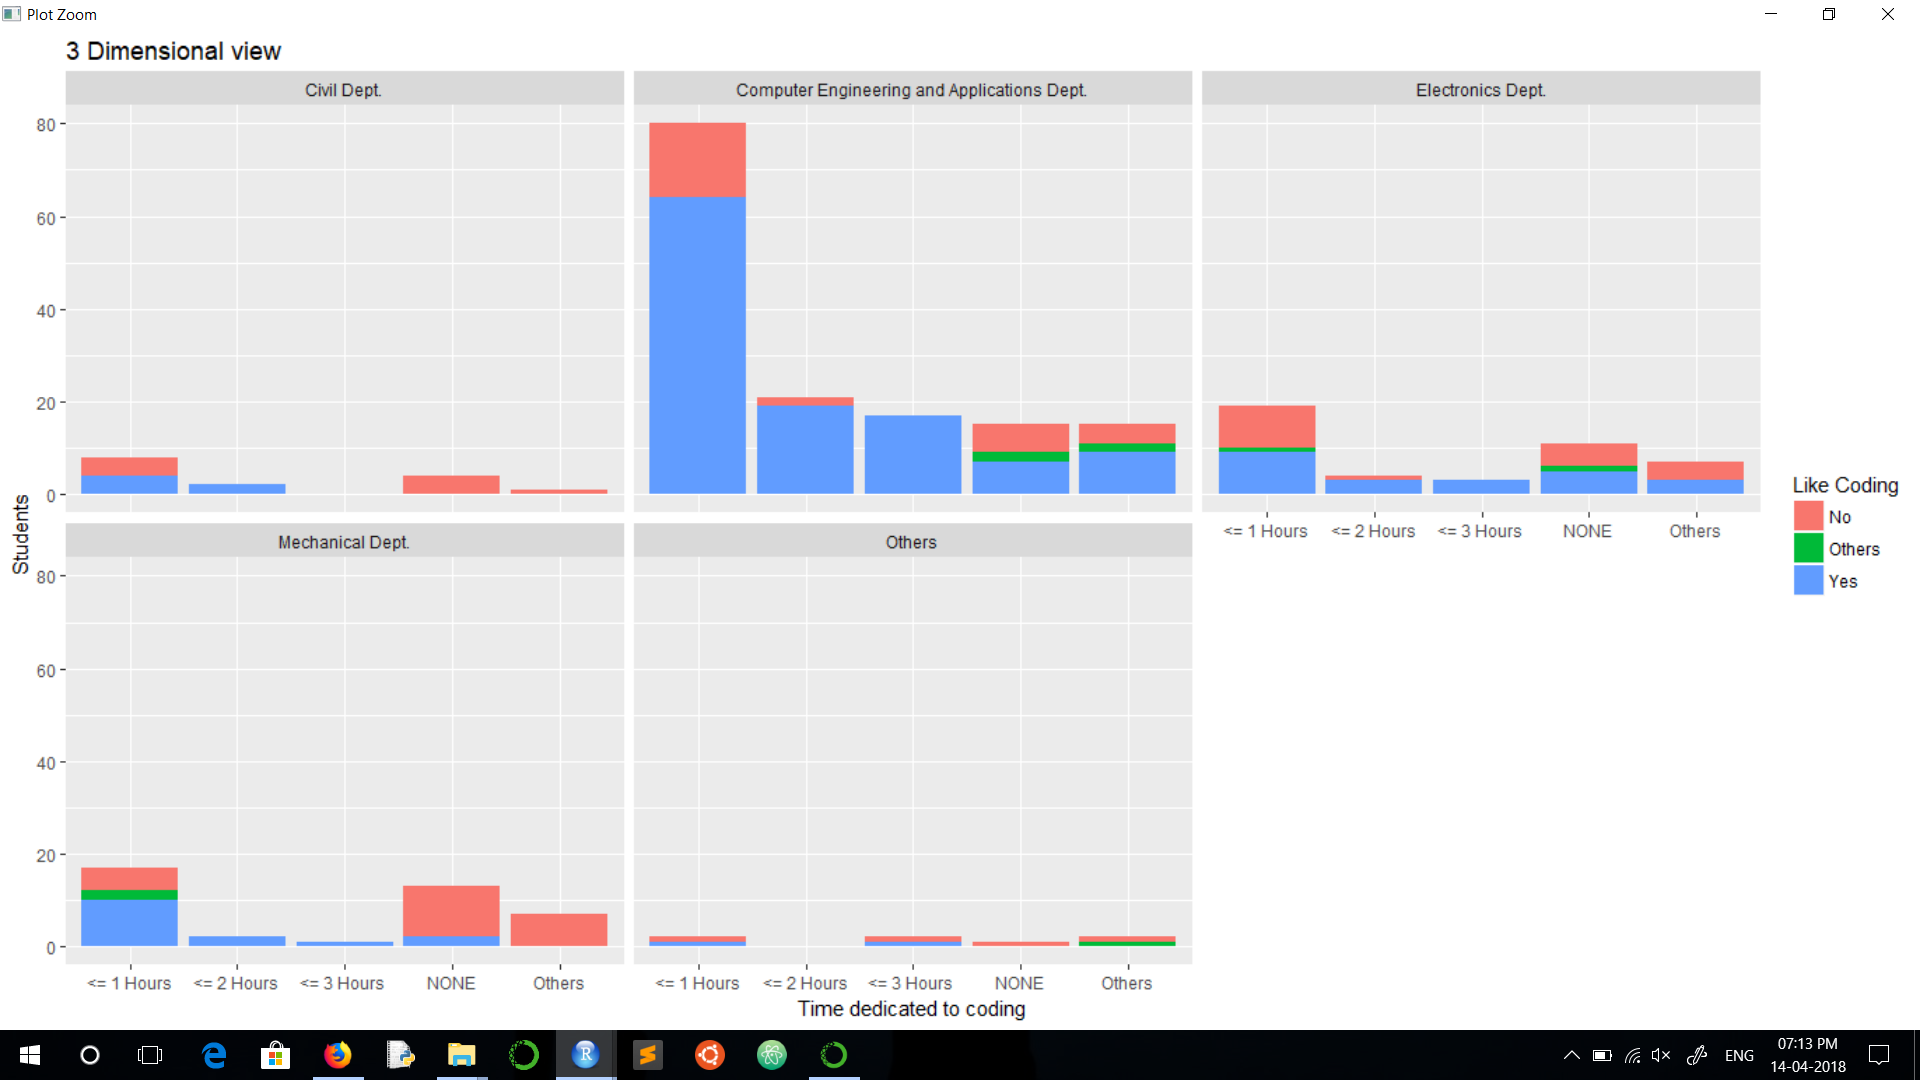

In [3]:
from IPython.display import Image
Image(filename='img3.png')